In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk
from nltk.corpus import stopwords 

In [2]:
# data_path = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/train.tsv'
# df = load_data(data_path)
# sentences = df['Phrase']

## test

In [3]:
# data_t = np.array(pd.read_csv('/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/train.tsv',sep='\t', header=0, nrows=5))
# X_text = df_t[?]#取出phrase列


# print(len(sentences_t))
# print('---')
# print(data_t)


## load data (fin)

In [4]:
def load_data(data_path,rows=None):
    '''load data from tsv file'''
    if not rows:
        df = pd.read_csv(data_path, sep='\t', header=0) 
    df = pd.read_csv(data_path, sep='\t', header=0 ,nrows=rows)
    return np.array(df)

# test

## visualize data

In [5]:
def visualize_data(data):#还可以改改 或者不写也行
    '''visualize original data'''
    
    return 1


## clean text (fin)

In [6]:
def remove_stopword(data_orig):
    '''
    remove stopwords in the wordlist
    
    data: array
    return an array
    '''
    data_filtered = data_orig.copy()   
    for i in range(data_orig.shape[0]):# 通过遍历修改data[i][2]的字符串
        filtered_words = [word.lower() for word in data_orig[i][2].split() if word not in stopwords.words('english')]
        l = ' '.join(filtered_words)
        data_filtered[i][2] = ' '.join(filtered_words) 
    return data_filtered


# test
# d = np.array([[1,1,'A series of escapades demonstrating the a',1],
#                [2,1, 'A series of escapades demonstrating the adage that what is good for the goose', 2],
#                [3, 1, 'A series' ,2],
#                [4, 1, 'A', 2],
#                [5, 1, 'series', 2]])
# d_f = remove_stopword(d)
# d_f

## make dictionary=tokenize

In [7]:
# 之后要把这里的data改成X，不要整个data进入
def make_dict_bow(data_filtered, text_col=2):
    '''
    make a bow dictionary based on all the words in the text
    return a set that contains a word list mapped with numbers
    
    data: filtered data with all columns
    text_col: text column index
    '''
    # make a non-repetitive word set
    word_set = set()
    for row in data_filtered:
        for word in row[text_col].split():
            word_set.add(word) # ('a','b')
            
    # map each string with an index number
    word_size = len(word_set)
    dict_bow = dict(zip(word_set,range(word_size))) # {'a':0,'b':1}
                    
    return dict_bow

                    
def make_dict_ng(data_filtered, text_col=2, ngram = 3):
    '''
    make a n-gram dict
    
    data_filtered: sentences array
    ngram: n-gram number
    '''
    # "在一般的文本分类任务中,N 取 3 就足够了
    
    # make a non-repetitive word set 
    word_set = set()
    for row in data_filtered:
        wordlist_row = row[text_col].split()
        for n in range(ngram):
            for i in range(len(wordlist_row) - n):
                word_set.add(' '.join(wordlist_row[ i : i + ngram ])) # ('a','a b')
        
    # map each string with an index number
    word_size = len(word_set)
    dict_ng = dict(zip(word_set,range(word_size))) # {'a':0,'b':1}
    
    return dict_ng

# test passed!
# d2 = np.array([['1', '1', 'a series escapades demonstrating', '1'],
#        ['2', '1', 'a series escapades demonstrating adage good goose',
#         '2'],
#        ['3', '1', 'a series', '2'],
#        ['4', '1', 'a', '2'],
#        ['5', '1', 'series', '2']], dtype='<U77')
# print('d2_bow: ', make_dict_bow(d2,2))
# print('d2_ng: ', make_dict_ng(d2))



## data -> vec

In [8]:
def vectorize_bow(data_filtered, dict_bow, text_col=2): 
    '''
    data_filtered: array, filtered data
    return an array of vectorized features
    '''
    features_bow = np.zeros((data_filtered.shape[0],len(dict_bow)))
    for i in range(data_filtered.shape[0]): # array中的每个句子：
        phrase_i = data_filtered[i][text_col]
        wordlist = phrase_i.split()
        for word in wordlist: # for每个句子中的每个单词：
            if word in dict_bow:# if这个单词在字典中：
                j = dict_bow[word]
                features_bow[i][j] += 1 # features对应dict相同index的位置变为1
    return features_bow


def vectorize_ng(data_filtered, dict_ng, text_col=2, ngram=3): # N-gram：ng_vectorizer.transform(corpus)
    '''
    data_filtered: array, filtered data
    return an array of vectorized features
    '''
    features_ng = np.zeros((data_filtered.shape[0],len(dict_ng)))
    for i in range(data_filtered.shape[0]): # for array中的每个句子
        phrase_i = data_filtered[i][text_col]
        wordlist = phrase_i.split()
        for n in range(ngram):
            for index in range(len(wordlist)-n): # for每个句子中的每个word_ng：
                word_ng = ' '.join(wordlist[ index : index + n+1 ])
                # print(index, word_ng)
                if word_ng in dict_ng: # if这个word_ng在字典中：
                    j = dict_ng[word_ng]
                    features_ng[i][j] += 1 # features对应dict相同index的位置+1
    return features_ng

# test passed!
# a3 = np.array([['1', '1', 'a series escapades demonstrating', '1'],
#        ['2', '1', 'a series escapades demonstrating adage good goose',
#         '2'],
#        ['3', '1', 'a series', '2'],
#        ['4', '1', 'a', '2'],
#        ['5', '1', 'series', '2']], dtype='<U77')
# print('original data: \n',a3,'\n')

# dict_bow_t = make_dict_bow(a3,2)
# dict_ng_t = make_dict_ng(a3)

# f_t_bow = vectorize_bow(a3, dict_bow_t)
# f_t_ng = vectorize_ng(a3, dict_ng_t)
# print(dict_bow_t, '\n', '*'*25, '\n',f_t_bow)
# print('\n')
# print(dict_ng_t, '\n', '*'*25, '\n', f_t_ng)

## train (get model+gradient descent)

cost function:

$$
\begin{aligned}
\mathcal{R}(w)
	&=-\frac{1}{N}\displaystyle \sum^{N}_{n=1}\mathcal{L}(y^{(n)},\hat y^{(n)})\\
	&=-\frac{1}{N}\displaystyle \sum^{N}_{n=1}{\left(y^{(n)}\right)^T\log \hat y^{(n)}\\}
\end{aligned}\tag{3.6}
$$

gradient:

$$
\frac{\partial \mathcal{R}(w)}{\partial w}=-\frac{1}{N}\sum_{n=1}^{N}{x^{(n)}(y^{(n)}-\hat y^{(n)})}\tag{3.7}
$$


In [37]:
def softmax(z):
    '''compute the softmax output of z = wx + b'''
    ez = np.exp(z.T)
    sm = ez / np.sum(ez,axis=0)
    return sm.T

def compute_loss(X_train, Y_train, W, b=0.):
    '''
    compute the loss of given parameters
    
    Args:
        X (array, (m,n)): m training examples, n features
        Y (array, (m,c))
        W (array, (n,c))
        b (scalar)
    '''
    
    m,n = X_train.shape
    Z = X_train.dot(W) + b    # (m, N)
    Y_hat = softmax(Z)  # (m, N)
    loss = np.sum(np.dot(Y_train,np.log(Y_hat))) * (-1) / m
    return loss


def to_one_hot(y, n_classes):
    '''
    convert y to one hot vector
    c: number of categories
    y: (m,)
    '''
    y_onehot = np.zeros((len(y), n_classes))
    for i in range(y.shape[0]):
        y_onehot[i, y[i]] += 1
    return y_onehot # (m,c)


def train(X_train, y_train, epochs, alpha, n_classes=5, gd='mini-batch'):
    '''
    learn the parameters
    
    Args:
        X_train (array, (m,n)): m for training examples, n for features
        Y_train (array, (m,c)): onehot
        alpha (float): learning rate
        epochs (int): 
        gd (string): method for gradient descent. 'batch', 'stochastic' or 'mini-batch'
    Return
        W (array, (n,N)): parameters
        loss_hist (list)
    '''
    
    m,n = X_train.shape
    loss_hist = []
    W = np.zeros((n, n_classes))
    b = np.zeros(n_classes)
    
    if gd == 'batch':
        batch_size = m # 每个batch里的example数
        batch_num = 1
    if gd == 'stochastic':
        batch_size = 1
        batch_num = m
    if gd == 'mini-batch':
        batch_size = 32 # temp
        batch_num = m // batch_size + 1 # 1 for the non-full batch
        
    for e in range(epochs):
        
        #shuffle
        arr_XY = list(zip(X_train, y_train))
        np.random.shuffle(arr_XY)
        X_sf, y_sf = zip(*arr_XY)
        X_sf, y_sf = np.array(X_sf),np.array(y_sf) #x(m,n),y(m,c)
        
        y_hat = softmax(X_sf@W + b) #predicted y, full (m,c)
        ## print(X_sf@W + b,y_hat[0:2,:])
        
        # update parameters after iterating over all exmpls in one batch. mini-batch by default.
        # BGD iterates over all exmpls at one time; SGD iterates over one exmpl at a time
        for k in range(batch_num):# for every batch（bgd has one batch, sgd has m batches)
            
            # compute gradient
            X_batch = X_sf[ k * batch_size : ((k+1) * batch_size), :]
            y_hat_batch = y_hat[k * batch_size : ((k+1) * batch_size):, :]
            y_onehot_batch = y_sf[k * batch_size : ((k+1) * batch_size), :]
            # print(y_hat_batch[:1,:],y_onehot_batch[:1,:],'\n', X_batch[:1,:])
            dj_dw = (1/batch_size)*np.dot(X_batch.T, (y_hat_batch - y_onehot_batch)) 
            # print('dj_dw',dj_dw)
            dj_db = (1/batch_size)*np.sum(y_hat_batch - y_onehot_batch)

            # gradient descent
            W = W - alpha * dj_dw
            b = b - alpha * dj_db
            
            # Save cost at each iteration (of a batch)
            # loss = (-1/batch_size)*np.sum(np.dot(y_onehot_batch.T,np.log(y_hat_batch)))
            loss = - np.sum((np.log(y_hat_batch) / batch_size) * y_onehot_batch)
            loss_hist.append(loss) # compute_loss(X_sf, y_sf, W, b) 
            
        # print loss at every 10 epochs
        if (e % 100 == 0):
            print(f"[Epoch {e+1}] Batch {k+1}: Loss {float(loss_hist[-1]):8.2f}")
            
    return W, b, loss_hist


### plotting

In [10]:
def plot_loss(loss_hist):
    '''
    loss_hist: list
    '''
    fig = plt.figure()
    plt.plot(loss_hist)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    return plt.show()

# plot_loss(loss_hist)

### prediction

In [11]:
# 很有精神！接下来写plot和 acc

def decide_label(y):
    '''
    convert y_onehot or y_hat to labels
    
    y: array,(m,c)
    '''
    y_label= np.array([np.argmax(y[i]) for i in range(y.shape[0])],dtype=int)
    return y_label # array, (m,)

# def compute_accuracy(y_predict, y_test)

In [12]:
a = np.array([[10,2,3,4,0],[2,3,4,5,9],[5,9,5,8,99]])
b = np.array([[0,0,0,1,0],[0,0,0,0,1],[1,0,0,0,0]])
type(np.max(a))
np.array([np.argmax(b[i]) for i in range(b.shape[0])],dtype=int)

array([3, 4, 0])

## Experiment 1: ng-2, lr = 1e0, exmpl=10k, epoch=100, BGD 【stopword removed】

In [26]:
# full test1: small size passed!
# X_train_t = f_t_ng
# m,n = X_train_t.shape
# y_train_t = np.array([d_f[i, 3] for i in range(X_train_t.shape[0])], dtype = int)
# W_init = np.zeros((n,))
# print(X_train_t.shape,y_train_t.shape,W_init.shape)
# train(X_train_t, y_train_t, W_init, b_init=0, epochs=2, alpha=0.1, gd='mini-batch')


# full test2: large size
data_path2 = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/train.tsv'
test_path = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/test.tsv'
data_orig2 = load_data(data_path2,10000)
test_orig = load_data(test_path)
data_filtered2, test_filtered = remove_stopword(data_orig2), remove_stopword(test_orig)

## tokenization-data-orig
dict_bow2 = make_dict_bow(data_filtered2)
dict_ng2 = make_dict_ng(data_filtered2)
print(f"Length of bow dictionary: {len(dict_bow2)}")
print(f"Length of ng dictionary: {len(dict_ng2)}")
features_bow2 = vectorize_bow(data_filtered2, dict_bow2)
features_ng2 = vectorize_ng(data_filtered2, dict_ng2)

## training
X_train2 = features_ng2
m2,n2 = X_train2.shape
y_train2 = np.array([data_filtered2[i, 3] for i in range(X_train2.shape[0])], dtype = int)
y_train2_onehot = to_one_hot(y_train2,5)
w_final, b_final, loss_hist = train(X_train2, y_train2_onehot, epochs=1000, alpha=1, gd='batch')
print(f"learned w: {w_final}\n learned b: {b_final}\n")
print('\n','*'*50,'\n')
print(f"l_h:\n{loss_hist}")
# print(X_train2.shape,y_train2.shape,W_init2.shape)



Length of bow dictionary: 2524
Length of ng dictionary: 9036
[Epoch 1] Batch 1: Loss     1.61
[Epoch 101] Batch 1: Loss     1.44
[Epoch 201] Batch 1: Loss     1.35
[Epoch 301] Batch 1: Loss     1.29
[Epoch 401] Batch 1: Loss     1.25
[Epoch 501] Batch 1: Loss     1.21
[Epoch 601] Batch 1: Loss     1.18
[Epoch 701] Batch 1: Loss     1.16
[Epoch 801] Batch 1: Loss     1.13
[Epoch 901] Batch 1: Loss     1.11
learned w: [[-0.01702338 -0.05811334  0.04241963 -0.04500197  0.07771906]
 [-0.10459662  0.12225221 -0.05082409  0.14426644 -0.11109795]
 [-0.0319672   0.02149164  0.07708354 -0.03930287 -0.02730511]
 ...
 [-0.00736228  0.21751266 -0.16920717 -0.03146367 -0.00947953]
 [-0.0026786   0.20029616 -0.03203183 -0.08464018 -0.08094556]
 [-0.06610899 -0.10169664 -0.11007641  0.1597496   0.11813244]]
 learned b: [8.64525118e-16 8.64525118e-16 8.64525118e-16 8.64525118e-16
 8.64525118e-16]


 ************************************************** 

l_h:
[1.6094379124341003, 1.6046283708577107, 1.60

In [30]:
## tokenization-test-orig
features_ng_test = vectorize_ng(test_filtered, dict_ng2)

## testing
X_test = features_ng_test
m_test, n_test = X_test.shape

z_test = np.dot(X_test, w_final) + b_final
Y_hat_test = softmax(z_test)  # array, (m,c) m=test examples
y_label = decide_label(Y_hat_test) # (m,)

## save results
result_l = []
for i in range(m_test):
    result_l.append([test_orig[i][0], y_label[i-1]])
df = pd.DataFrame(result_l,columns = ['PhraseId', 'Sentiment'])
df.to_csv('/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/result.csv',index=False)

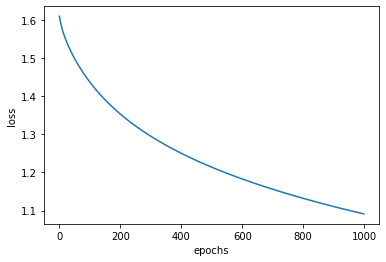

In [28]:
plot_loss(loss_hist)

In [ ]:
# accuracy: 0.33

## Experiment 2: ng-2, lr = 1e0, exmpl=10k, epoch=100, BGD 【stopword not removed】

In [31]:
data_path2 = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/train.tsv'
test_path = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/test.tsv'
data_orig2 = load_data(data_path2,10000)
test_orig = load_data(test_path)
# data_filtered2, test_filtered = remove_stopword(data_orig2), remove_stopword(test_orig)

## tokenization-data-orig
dict_bow2 = make_dict_bow(data_orig2)
dict_ng2 = make_dict_ng(data_orig2)
print(f"Length of bow dictionary: {len(dict_bow2)}")
print(f"Length of ng dictionary: {len(dict_ng2)}")
features_bow2 = vectorize_bow(data_orig2, dict_bow2)
features_ng2 = vectorize_ng(data_orig2, dict_ng2)

## training
X_train2 = features_ng2
m2,n2 = X_train2.shape
y_train2 = np.array([data_orig2[i, 3] for i in range(X_train2.shape[0])], dtype = int)
y_train2_onehot = to_one_hot(y_train2,5)
w_final, b_final, loss_hist = train(X_train2, y_train2_onehot, epochs=1000, alpha=1, gd='batch')
print(f"learned w: {w_final}\n learned b: {b_final}\n")
print('\n','*'*50,'\n')
print(f"l_h:\n{loss_hist}")
# print(X_train2.shape,y_train2.shape,W_init2.shape)



Length of bow dictionary: 2725
Length of ng dictionary: 12294
[Epoch 1] Batch 1: Loss     1.61
[Epoch 101] Batch 1: Loss     1.37
[Epoch 201] Batch 1: Loss     1.28
[Epoch 301] Batch 1: Loss     1.22
[Epoch 401] Batch 1: Loss     1.18
[Epoch 501] Batch 1: Loss     1.14
[Epoch 601] Batch 1: Loss     1.11
[Epoch 701] Batch 1: Loss     1.09
[Epoch 801] Batch 1: Loss     1.06
[Epoch 901] Batch 1: Loss     1.04
learned w: [[-0.01132688 -0.02383793 -0.07061232 -0.03003487  0.135812  ]
 [ 0.08719785  0.02616528 -0.0857693  -0.0209     -0.00669383]
 [-0.02675423 -0.04447793 -0.03531317 -0.06460311  0.17114844]
 ...
 [-0.02101072 -0.05003555  0.0255976   0.06829491 -0.02284625]
 [-0.00363867 -0.01242275 -0.04318345  0.06496303 -0.00571816]
 [ 0.01770242  0.14327203 -0.03443316 -0.06970045 -0.05684084]]
 learned b: [7.73284214e-17 7.73284214e-17 7.73284214e-17 7.73284214e-17
 7.73284214e-17]


 ************************************************** 

l_h:
[1.6094379124341, 1.5928916416056864, 1.5805

In [32]:
## tokenization-test-orig
features_ng_test = vectorize_ng(test_orig, dict_ng2)

## testing
X_test = features_ng_test
m_test, n_test = X_test.shape

z_test = np.dot(X_test, w_final) + b_final
Y_hat_test = softmax(z_test)  # array, (m,c) m=test examples
y_label = decide_label(Y_hat_test) # (m,)

## save results
result_l = []
for i in range(m_test):
    result_l.append([test_orig[i][0], y_label[i-1]])
df = pd.DataFrame(result_l,columns = ['PhraseId', 'Sentiment'])
df.to_csv('/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/result2.csv',
          index=False)


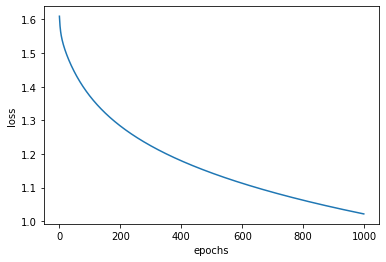

In [33]:
plot_loss(loss_hist)

In [ ]:
# accuracy: 0.37

## Experiment 3: ng-2, lr = 1e0, exmpl=10k, epoch=100, MBGD 【stopword not removed】

In [41]:
# full test1: small size passed!
# X_train_t = f_t_ng
# m,n = X_train_t.shape
# y_train_t = np.array([d_f[i, 3] for i in range(X_train_t.shape[0])], dtype = int)
# W_init = np.zeros((n,))
# print(X_train_t.shape,y_train_t.shape,W_init.shape)
# train(X_train_t, y_train_t, W_init, b_init=0, epochs=2, alpha=0.1, gd='mini-batch')


# full test2: large size
data_path2 = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/train.tsv'
test_path = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/test.tsv'
data_orig2 = load_data(data_path2,8000)
test_orig = load_data(test_path)
data_filtered2, test_filtered = remove_stopword(data_orig2), remove_stopword(test_orig)

## tokenization-data-orig
dict_bow2 = make_dict_bow(data_filtered2)
dict_ng2 = make_dict_ng(data_filtered2)
print(f"Length of bow dictionary: {len(dict_bow2)}")
print(f"Length of ng dictionary: {len(dict_ng2)}")
features_bow2 = vectorize_bow(data_filtered2, dict_bow2)
features_ng2 = vectorize_ng(data_filtered2, dict_ng2)

## training
X_train2 = features_ng2
m2,n2 = X_train2.shape
y_train2 = np.array([data_filtered2[i, 3] for i in range(X_train2.shape[0])], dtype = int)
y_train2_onehot = to_one_hot(y_train2,5)
w_final, b_final, loss_hist = train(X_train2, y_train2_onehot, epochs=1000, alpha=1, gd='mini-batch')
print(f"learned w: {w_final}\n learned b: {b_final}\n")
print('\n','*'*50,'\n')
print(f"l_h:\n{loss_hist}")
# print(X_train2.shape,y_train2.shape,W_init2.shape)



Length of bow dictionary: 2103
Length of ng dictionary: 7216
[Epoch 1] Batch 251: Loss    -0.00
[Epoch 101] Batch 251: Loss    -0.00
[Epoch 201] Batch 251: Loss    -0.00
[Epoch 301] Batch 251: Loss    -0.00
[Epoch 401] Batch 251: Loss    -0.00
[Epoch 501] Batch 251: Loss    -0.00
[Epoch 601] Batch 251: Loss    -0.00
[Epoch 701] Batch 251: Loss    -0.00
[Epoch 801] Batch 251: Loss    -0.00
[Epoch 901] Batch 251: Loss    -0.00


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
## tokenization-test-orig
features_ng_test = vectorize_ng(test_orig, dict_ng2)

## testing
X_test = features_ng_test
m_test, n_test = X_test.shape

z_test = np.dot(X_test, w_final) + b_final
Y_hat_test = softmax(z_test)  # array, (m,c) m=test examples
y_label = decide_label(Y_hat_test) # (m,)

## save results
result_l = []
for i in range(m_test):
    result_l.append([test_orig[i][0], y_label[i-1]])
df = pd.DataFrame(result_l,columns = ['PhraseId', 'Sentiment'])
df.to_csv(f"/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/result3_ng2_lr1_exmpl10k_epoch100_MBGD.csv",
          index=False)

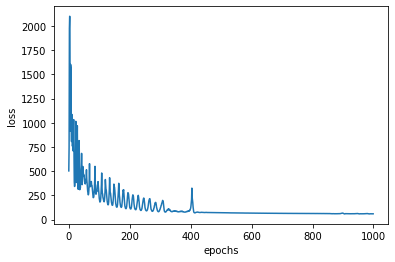

In [36]:
plot_loss(loss_hist)

In [ ]:
# accuracy: 0.36

## Experiment 4: bow, lr = 1e0, exmpl=10k, epoch=100, BGD 【stopword not removed】

cf. experiment 2

In [ ]:
data_path2 = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/train.tsv'
test_path = '/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/test.tsv'
data_orig2 = load_data(data_path2,10000)
test_orig = load_data(test_path)
# data_filtered2, test_filtered = remove_stopword(data_orig2), remove_stopword(test_orig)

## tokenization-data-orig
dict_bow2 = make_dict_bow(data_orig2)
dict_ng2 = make_dict_ng(data_orig2)
print(f"Length of bow dictionary: {len(dict_bow2)}")
print(f"Length of ng dictionary: {len(dict_ng2)}")
features_bow2 = vectorize_bow(data_orig2, dict_bow2)
features_ng2 = vectorize_ng(data_orig2, dict_ng2)

## training
X_train2 = features_bow2
m2,n2 = X_train2.shape
y_train2 = np.array([data_orig2[i, 3] for i in range(X_train2.shape[0])], dtype = int)
y_train2_onehot = to_one_hot(y_train2,5)
w_final, b_final, loss_hist = train(X_train2, y_train2_onehot, epochs=1000, alpha=1, gd='batch')
print(f"learned w: {w_final}\n learned b: {b_final}\n")
print('\n','*'*50,'\n')
print(f"l_h:\n{loss_hist}")
# print(X_train2.shape,y_train2.shape,W_init2.shape)



In [ ]:
## tokenization-test-orig
features_ng_test = vectorize_ng(test_orig, dict_ng2)

## testing
X_test = features_ng_test
m_test, n_test = X_test.shape

z_test = np.dot(X_test, w_final) + b_final
Y_hat_test = softmax(z_test)  # array, (m,c) m=test examples
y_label = decide_label(Y_hat_test) # (m,)

## save results
result_l = []
for i in range(m_test):
    result_l.append([test_orig[i][0], y_label[i-1]])
df = pd.DataFrame(result_l,columns = ['PhraseId', 'Sentiment'])
df.to_csv('/Users/zhanghan/mygithub/nlp-beginner/task1-sentiment-analysis-on-movie-reviews/result4_bow_lr1_exmpl10k_epoch100_BGD.csv',
          index=False)


In [ ]:
plot_loss(loss_hist)

In [ ]:
# accuracy: 